In [4]:
!wget https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&e=1&dl=0

!unzip train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&e=1&dl=0

--2024-10-14 06:01:33--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4e59384d172d20993b14066118.dl.dropboxusercontent.com/cd/0/inline/CcaWRAhtCKqMoniJFL0E-wLTvzN7bnq-OOid3t2f7u70SLaUlXSaWv0OoufmbheSsP40TS5JWGUWShvAA6I2-7dINNVNmkKkkc8LNEpCxHPwZOG1IC0kJFe4AUB40CQm5IdGfq3sw6SGHvGlBxtRnB2s/file# [following]
--2024-10-14 06:01:34--  https://uc4e59384d172d20993b14066118.dl.dropboxusercontent.com/cd/0/inline/CcaWRAhtCKqMoniJFL0E-wLTvzN7bnq-OOid3t2f7u70SLaUlXSaWv0OoufmbheSsP40TS5JWGUWShvAA6I2-7dINNVNmkKkkc8LNEpCxHPwZOG1IC0kJFe4AUB40CQm5IdGfq3sw6SGHvGlBxtRnB2s/file
Resolving uc4e59384d172d20993b14066118.dl.dropboxusercontent.com (uc4e59384d172d20993b14066118.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:

In [15]:
!wget -O train.zip "https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&e=1&dl=0"
!unzip train.zip

--2024-10-14 06:36:39--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&e=1&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc89941622ade2e820c2db525ee7.dl.dropboxusercontent.com/cd/0/inline/CcaLXGv7_KsitH3Ne9ZGRRx1pScppGzsdl7N7zMSmUNiwuflheve2QQPl-M2cqzv855NA6vazkOx14gHPrfGZ02QzAcekkz4czLixhPlAe5nNHLfI7_XAPaknkoByJ5kyy7mOOVrannp6wIbkNtAZrfQ/file# [following]
--2024-10-14 06:36:40--  https://uc89941622ade2e820c2db525ee7.dl.dropboxusercontent.com/cd/0/inline/CcaLXGv7_KsitH3Ne9ZGRRx1pScppGzsdl7N7zMSmUNiwuflheve2QQPl-M2cqzv855NA6vazkOx14gHPrfGZ02QzAcekkz4czLixhPlAe5nNHLfI7_XAPaknkoByJ5kyy7mOOVrannp6wIbkNtAZrfQ/file
Resolving uc89941622ade2e820c2db525ee7.dl.dropboxusercontent.com (uc89941622ade2e820c2db525ee7.dl.dropboxusercontent.com)... 162.125.5.15, 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator

Building the model

In [11]:
base_model = MobileNet(input_shape=(224,224,3), include_top= False) #Defines the shape of the input images as 224x224 with 3 color channels (RGB).

for layer in base_model.layers:
  layer.trainable = False     #Freezes all the layers of the base model so that they don't get retrained, which is useful to retain the pre-trained features.

x=Flatten()(base_model.output)
x=Dense(units=7 , activation='softmax')(x)  #Adds a new fully connected layer with 7 output units (as there are 7 emotion classes) and a softmax activation for multi-class classification.

model = Model(base_model.input,x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,580,103 (13.66 MB)

 Trainable params: 351,239 (1.34 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [13]:
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics=['accuracy'])

Preparing data

In [16]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255           #Normalizes the pixel values to [0, 1].
)


train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [18]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )


Found 350 images belonging to 7 classes.


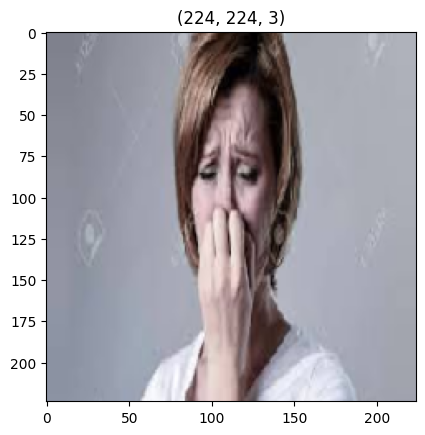

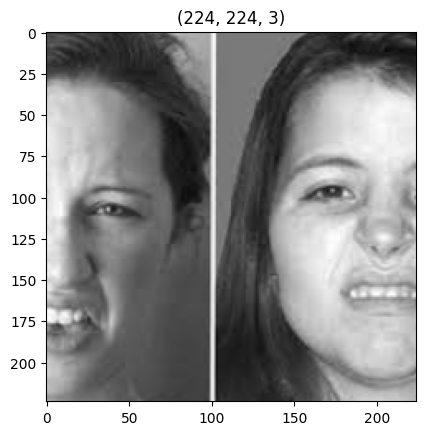

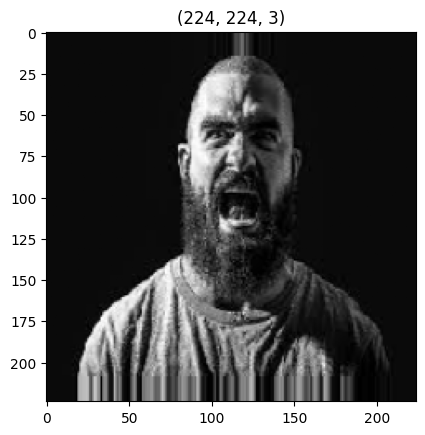

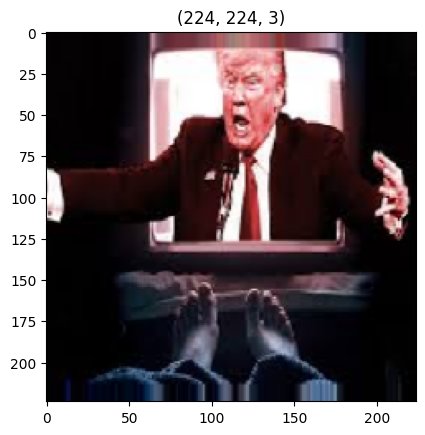

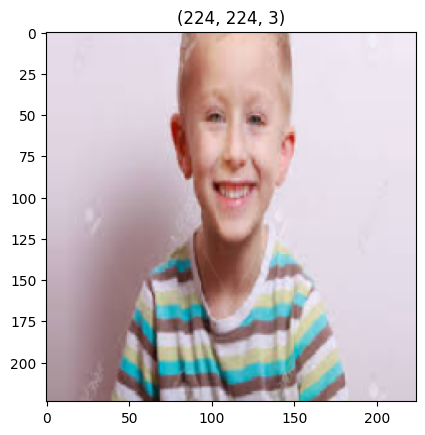

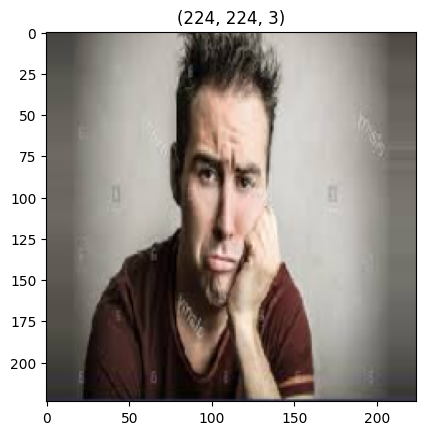

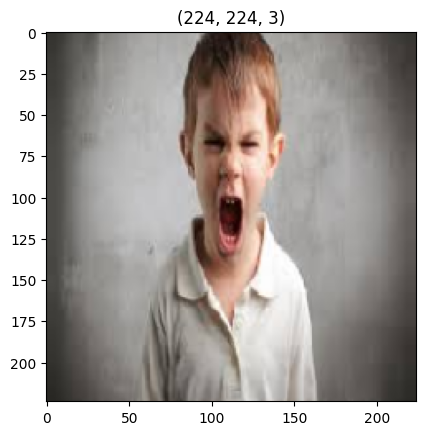

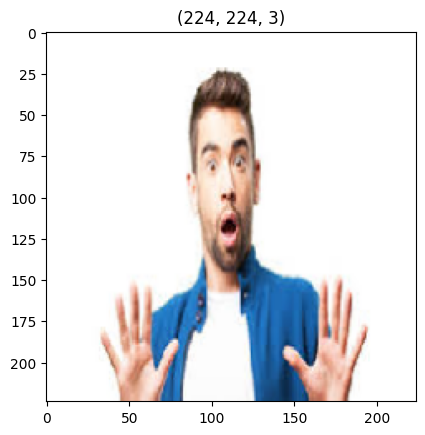

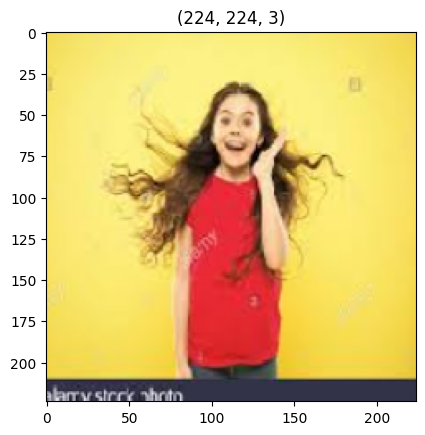

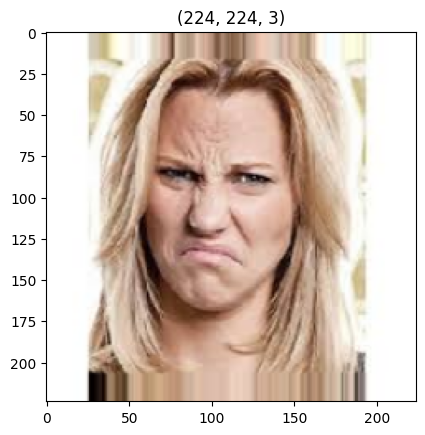

In [21]:
t_img , label = next(train_data)

def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

plotImages(t_img, label)


In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')  #Stops training if the validation accuracy doesn't improve for 5 epochs, preventing overfitting.

# model check point
mc = ModelCheckpoint(filepath="best_model.keras", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')


call_back = [es, mc]
hist = model.fit(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1583 - loss: 8.8383
Epoch 1: val_accuracy improved from -inf to 0.45312, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.1624 - loss: 8.9117 - val_accuracy: 0.4531 - val_loss: 5.7276
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2812 - loss: 7.3910

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.45312 to 0.60638, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 519ms/step - accuracy: 0.2812 - loss: 7.3910 - val_accuracy: 0.6064 - val_loss: 2.9796
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5060 - loss: 4.9571
Epoch 3: val_accuracy improved from 0.60638 to 0.75781, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.5072 - loss: 4.8892 - val_accuracy: 0.7578 - val_loss: 1.5200
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5312 - loss: 2.4010
Epoch 4: val_accuracy did not improve from 0.75781
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 447ms/step - accuracy: 0.5312 - loss: 2.4010 - val_accuracy: 0.7128 - val_loss: 2.2675
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7420 - loss: 1.8082
Epoch 5: val_accuracy improved from 0.75781 to 0.82422, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.7420 - loss: 1.7849 - val_acc

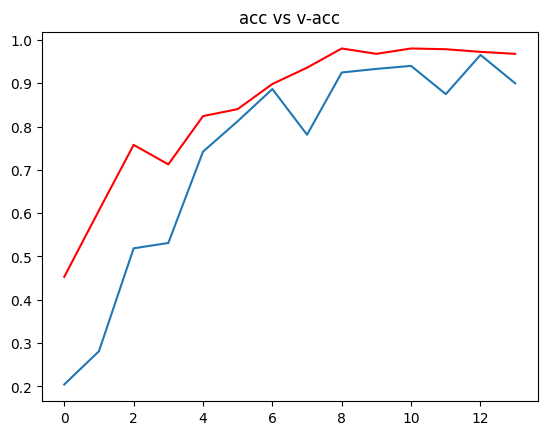

In [27]:
from keras.models import load_model
model = load_model("/content/best_model.keras")

h =  hist.history
h.keys()

keys_list = list(h.keys())
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
 the image is of Fear


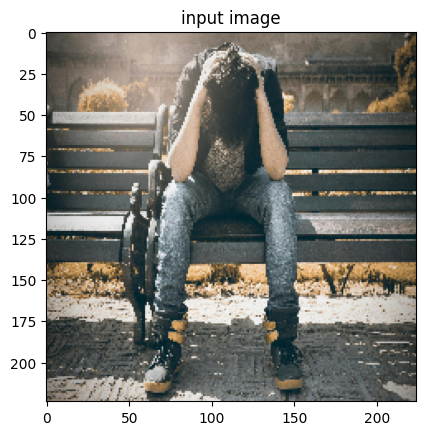

In [29]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))


# path for the image to see if it predics correct class

path = "/content/check2.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr)) #Selects the class with the highest probability, and maps it back to the class name using op.

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()